## <center>Prueba 2 Simulación Chimborazo</center>

**Estudiante:** Adriana Castillo

**Personal:** 115

**Camas:** 300

**Respiradores:** 5

**UCI:** 5

**CASOS Iniciales:** 100


### Obtener Media

In [1]:
import pandas as pd
import numpy as np

url = 'Casos.xlsx'
df = pd.read_excel(url)
df = df.replace(np.nan, 0)
df=df[df['Provincia']=="Chimborazo"]
filtro = df.iloc[0].loc['19/3/2020':]
media = filtro.mean()*3
print(media)

146.9142857142857


In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS
HOSPITALES = 1
CAMAS = 300
RESPIRADORES=5
UCI=5
PERSONAL=115

INFECTADOS= 100
TASA_CRECIMIENTO = int(media)
DIAS_INTERNADO = 10
DIAS_SIMULACION = 100

persona_recuperadas={}
persona_fallecidas={}

adultos_femenino=[]
adultos_masculino=[]

mayores_femenino=[]
mayores_masculino=[]

niños_femenino=[]
niños_masculino=[]

niños_femenino_sintomas=[]
niños_masculino_sintomas=[]
niños_femenino_nuemonia=[]
niños_masculino_nuemonia=[]
niños_femenino_cuidados=[]
niños_masculino_cuidados=[]
niños_femenino_fallecidos=[]
niños_masculino_fallecidos=[]
niños_femenino_recuperados=[]
niños_masculino_recuperados=[]

adultos_femeninos_nuemonia=[]
adultos_femeninos_cuidados=[]
adultos_femeninos_fallecidos=[]
adultos_femeninos_recuperados=[]
adultos_masculino_nuemonia=[]
adultos_masculino_cuidados=[]
adultos_masculino_fallecidos=[]
adultos_masculino_recuperados=[]

mayores_femeninos_nuemonia=[]
mayores_femeninos_cuidados=[]
mayores_femeninos_fallecidos=[]
mayores_femeninos_recuperados=[]
mayores_masculino_nuemonia=[]
mayores_masculino_cuidados=[]
mayores_masculino_fallecidos=[]
mayores_masculino_recuperados=[]


class Hospital(object):

    def __init__(self, env,num_cama,name,num_personal,num_uci, num_respiradores):
            self.env = env
            self.num_cama = num_cama
            self.num_personal = num_personal
            self.num_uci=num_uci
            self.num_respiradores=num_respiradores
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.uci = simpy.Resource(env, num_uci)
            self.respiradores = simpy.Resource(env, num_respiradores)
            self.name = name
        
    def ingresar(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("Paciente Nº", paciente, "salió de la hospitalización en el día ", int(self.env.now))
            
    def ucis(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente Nº", paciente, "salió de la UCI en el día ", int(self.env.now))
    
    def medicos(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente Nº", paciente, "finalizó su atención con el personal el día ", int(self.env.now))
    
def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    tipo_paciente = random.randint(1,100)
    
    ##LLEGA MAYOR
    if (tipo_paciente <= 7 and tipo_paciente > 0):
        
        genero= random.randint(1,7)
        if(genero<=3):
            mayores_masculino.append(1)
            ##HOMBRE
            
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                mayores_masculino_nuemonia.append(1)

                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente mayor (Masculino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor (Masculino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                mayores_masculino_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente mayor (Masculino) Nº", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            mayores_masculino_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            mayores_masculino_recuperados.append(1)

                                    else:
                                        print("El paciente mayor (Masculino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        mayores_masculino_fallecidos.append(1)

                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                mayores_masculino_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        mayores_masculino_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                mayores_masculino_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
            
            
        else:
            ##MUJER
            mayores_femenino.append(1)
            
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                mayores_femeninos_nuemonia.append(1)
                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente mayor (Femenino) Nº", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor (Femenino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                ##ASIGNAR UCI/RESPIRADOR
                                mayores_femeninos_cuidados.append(1)

                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente mayor (Femenino) Nº", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            mayores_femeninos_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            mayores_femeninos_recuperados.append(1)
                                    else:
                                        print("El paciente mayor (Femenino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        mayores_femeninos_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                mayores_femeninos_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        mayores_femeninos_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                mayores_femeninos_recuperados.append(1)
            ####Fin ETAPA NEUMONIA

   
    elif (tipo_paciente <= 28 and tipo_paciente > 7):
        ### LLEGA NIÑO

        genero= random.randint(1,28)
        if(genero<=13):
            niños_masculino.append(1)
            ##HOMBRE
            
            ##ETAPA SINTOMAS
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                niños_masculino_sintomas.append(1)

                ##ETAPA NUEMONIA
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    niños_masculino_nuemonia.append(1)

                    ##ASIGNAR CAMAS
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in requerimientoCamas:
                            print("Paciente niño Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now

                            ##ASIGNAR PERSONAL
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente niño Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    niños_masculino_cuidados.append(1)
                                    ##ASIGNAR UCI/RESPIRADOR
                                    with hospital.uci.request() as uci:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                        requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if uci in requerimientoUCI:
                                            print("El paciente niño Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.ucis(paciente))
                                            estado = random.randint(1,100)
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                niños_masculino_fallecidos.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                niños_masculino_recuperados.append(1)
                                        else:
                                            print("El paciente niño Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            niños_masculino_fallecidos.append(1)
                                        ####Fin CUIDADOS INTENSIVOS
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                    niños_masculino_recuperados.append(1)
                                    ####Fin ETAPA Intensivos

                                ####Fin PERSONAL
                        else:
                            print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            niños_masculino_fallecidos.append(1)
                        ####Fin CAMAS
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                    niños_masculino_recuperados.append(1)

                ####Fin ETAPA NEUMONIA

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Sintomas")
                niños_masculino_recuperados.append(1)
            ####Fin ETAPA SINTOMAS
            
        else:
            niños_femenino.append(1)
            ##MUJER
            
            ##ETAPA SINTOMAS
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                niños_femenino_sintomas.append(1)
                
                ##ETAPA NUEMONIA
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    niños_femenino_nuemonia.append(1)

                    ##ASIGNAR CAMAS
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in requerimientoCamas:
                            print("Paciente niña Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now

                            ##ASIGNAR PERSONAL
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente niña Nº ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    niños_femenino_cuidados.append(1)
                                    ##ASIGNAR UCI/RESPIRADOR
                                    with hospital.uci.request() as uci:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                        requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if uci in requerimientoUCI:
                                            print("El paciente niña Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.ucis(paciente))
                                            estado = random.randint(1,100)
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                niños_femenino_fallecidos.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                niños_femenino_recuperados.append(1)
                                        else:
                                            print("El paciente niña Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            niños_femenino_fallecidos.append(1)
                                        ####Fin CUIDADOS INTENSIVOS
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                    niños_femenino_recuperados.append(1)
                                    ####Fin ETAPA Intensivos

                                ####Fin PERSONAL
                        else:
                            print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            niños_femenino_fallecidos.append(1)
                        ####Fin CAMAS
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                    niños_femenino_recuperados.append(1)
                ####Fin ETAPA NEUMONIA

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Sintomas")
                niños_femenino_recuperados.append(1)
            ####Fin ETAPA SINTOMAS
            
        
    else:
        ##LLEGA ADULTO
        
        genero= random.randint(1,65)
        
        if(genero<=30):
            adultos_masculino.append(1)
            ##HOMBRE  
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                adultos_masculino_nuemonia.append(1)
                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente adulto (Masculino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now
                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto (Masculino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                adultos_masculino_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente adulto (Masculino) Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            adultos_masculino_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            adultos_masculino_recuperados.append(1)
                                    else:
                                        print("El paciente adulto (Masculino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        adultos_masculino_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                adultos_masculino_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        adultos_masculino_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                adultos_masculino_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
        
        else:
            adultos_femenino.append(1)
        ##MUJER
        
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                adultos_femeninos_nuemonia.append(1)

                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente adulto (Femenino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto (Femenino) Nº ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                adultos_femeninos_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente adulto (Femenino) Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            adultos_femeninos_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            adultos_femeninos_recuperados.append(1)
                                    else:
                                        print("El paciente adulto (Femenino) Nº " , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        adultos_femeninos_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                adultos_femeninos_recuperados.append(1)
                                ####Fin ETAPA Intensivos
                            ####Fin PERSONAL
                    else:
                        print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        adultos_femeninos_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                adultos_femeninos_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
        
        
       
    
def ejecutar(env, tasa_crecimiento, infectados):
    hospital = Hospital(env, CAMAS, "General Docente",PERSONAL,UCI,RESPIRADORES)
    for i in range(infectados):
        asignar_hospital(env, hospital, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega el paciente Nº", paciente, " en el día ", env.now)
        env.process(llegada_paciente(env, hospital, paciente))

print("\t\t\tSimulacion COVID-19 en Hospital General Docente (Chimborazo)\n")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO,INFECTADOS))
env.run(until=DIAS_SIMULACION)


			Simulacion COVID-19 en Hospital General Docente (Chimborazo)

Llega el paciente Nº 0  en el día  0
Llega el paciente Nº 1  en el día  0
Llega el paciente Nº 2  en el día  0
Llega el paciente Nº 3  en el día  0
Llega el paciente Nº 4  en el día  0
Llega el paciente Nº 5  en el día  0
Llega el paciente Nº 6  en el día  0
Llega el paciente Nº 7  en el día  0
Llega el paciente Nº 8  en el día  0
Llega el paciente Nº 9  en el día  0
Llega el paciente Nº 10  en el día  0
Llega el paciente Nº 11  en el día  0
Llega el paciente Nº 12  en el día  0
Llega el paciente Nº 13  en el día  0
Llega el paciente Nº 14  en el día  0
Llega el paciente Nº 15  en el día  0
Llega el paciente Nº 16  en el día  0
Llega el paciente Nº 17  en el día  0
Llega el paciente Nº 18  en el día  0
Llega el paciente Nº 19  en el día  0
Llega el paciente Nº 20  en el día  0
Llega el paciente Nº 21  en el día  0
Llega el paciente Nº 22  en el día  0
Llega el paciente Nº 23  en el día  0
Llega el paciente Nº 24  en el dí

Paciente adulto (Femenino) Nº  165  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  169  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  171  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  172  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  173  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  174  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 177  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  178  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  179  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  180  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  181  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  182  se le asigna una cama  hospit

Paciente adulto (Masculino) Nº  368  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  372  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  373  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  374  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  379  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  382  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  384  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  385  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 386  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  388  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  390  se le asigna una cama  hospital  General Docente
Llega el paciente Nº 393  en el día  3
Llega el paciente Nº 39

Llega el paciente Nº 641  en el día  4
Llega el paciente Nº 642  en el día  4
Llega el paciente Nº 643  en el día  4
Llega el paciente Nº 644  en el día  4
Llega el paciente Nº 645  en el día  4
Llega el paciente Nº 646  en el día  4
Llega el paciente Nº 647  en el día  4
Llega el paciente Nº 648  en el día  4
Llega el paciente Nº 649  en el día  4
Llega el paciente Nº 650  en el día  4
Llega el paciente Nº 651  en el día  4
Llega el paciente Nº 652  en el día  4
Llega el paciente Nº 653  en el día  4
Llega el paciente Nº 654  en el día  4
Llega el paciente Nº 655  en el día  4
Llega el paciente Nº 656  en el día  4
Llega el paciente Nº 657  en el día  4
Llega el paciente Nº 658  en el día  4
Llega el paciente Nº 659  en el día  4
Llega el paciente Nº 660  en el día  4
Llega el paciente Nº 661  en el día  4
Llega el paciente Nº 662  en el día  4
Llega el paciente Nº 663  en el día  4
Llega el paciente Nº 664  en el día  4
Llega el paciente Nº 665  en el día  4
Llega el paciente Nº 666 

Llega el paciente Nº 935  en el día  6
Llega el paciente Nº 936  en el día  6
Llega el paciente Nº 937  en el día  6
Llega el paciente Nº 938  en el día  6
Llega el paciente Nº 939  en el día  6
Llega el paciente Nº 940  en el día  6
Llega el paciente Nº 941  en el día  6
Llega el paciente Nº 942  en el día  6
Llega el paciente Nº 943  en el día  6
Llega el paciente Nº 944  en el día  6
Llega el paciente Nº 945  en el día  6
Llega el paciente Nº 946  en el día  6
Llega el paciente Nº 947  en el día  6
Llega el paciente Nº 948  en el día  6
Llega el paciente Nº 949  en el día  6
Llega el paciente Nº 950  en el día  6
Llega el paciente Nº 951  en el día  6
Llega el paciente Nº 952  en el día  6
Llega el paciente Nº 953  en el día  6
Llega el paciente Nº 954  en el día  6
Llega el paciente Nº 955  en el día  6
Llega el paciente Nº 956  en el día  6
Llega el paciente Nº 957  en el día  6
Llega el paciente Nº 958  en el día  6
Llega el paciente Nº 959  en el día  6
Llega el paciente Nº 960 

Llega el paciente Nº 1187  en el día  8
Llega el paciente Nº 1188  en el día  8
Llega el paciente Nº 1189  en el día  8
Llega el paciente Nº 1190  en el día  8
Llega el paciente Nº 1191  en el día  8
Llega el paciente Nº 1192  en el día  8
Llega el paciente Nº 1193  en el día  8
Llega el paciente Nº 1194  en el día  8
Llega el paciente Nº 1195  en el día  8
Llega el paciente Nº 1196  en el día  8
Llega el paciente Nº 1197  en el día  8
Llega el paciente Nº 1198  en el día  8
Llega el paciente Nº 1199  en el día  8
Llega el paciente Nº 1200  en el día  8
Llega el paciente Nº 1201  en el día  8
Llega el paciente Nº 1202  en el día  8
Llega el paciente Nº 1203  en el día  8
Llega el paciente Nº 1204  en el día  8
Llega el paciente Nº 1205  en el día  8
Llega el paciente Nº 1206  en el día  8
Llega el paciente Nº 1207  en el día  8
Llega el paciente Nº 1208  en el día  8
Llega el paciente Nº 1209  en el día  8
Llega el paciente Nº 1210  en el día  8
Llega el paciente Nº 1211  en el día  8


Paciente adulto (Femenino) Nº  1382 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 1384 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 1385 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 1386 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  1391 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 1393 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 1394 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 1396 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente mayor (Femenino) Nº 1397 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  1398 en el hospital  General Docente se ha recuperado en la etapa Neumoni

Llega el paciente Nº 1626  en el día  11
Llega el paciente Nº 1627  en el día  11
Llega el paciente Nº 1628  en el día  11
Llega el paciente Nº 1629  en el día  11
Llega el paciente Nº 1630  en el día  11
Llega el paciente Nº 1631  en el día  11
Llega el paciente Nº 1632  en el día  11
Llega el paciente Nº 1633  en el día  11
Llega el paciente Nº 1634  en el día  11
Llega el paciente Nº 1635  en el día  11
Llega el paciente Nº 1636  en el día  11
Llega el paciente Nº 1637  en el día  11
Llega el paciente Nº 1638  en el día  11
Llega el paciente Nº 1639  en el día  11
Llega el paciente Nº 1640  en el día  11
Llega el paciente Nº 1641  en el día  11
Llega el paciente Nº 1642  en el día  11
Llega el paciente Nº 1643  en el día  11
Llega el paciente Nº 1644  en el día  11
Llega el paciente Nº 1645  en el día  11
Llega el paciente Nº 1646  en el día  11
Llega el paciente Nº 1647  en el día  11
Llega el paciente Nº 1648  en el día  11
Llega el paciente Nº 1649  en el día  11
Llega el pacient

Llega el paciente Nº 1840  en el día  12
Llega el paciente Nº 1841  en el día  12
Llega el paciente Nº 1842  en el día  12
Llega el paciente Nº 1843  en el día  12
Llega el paciente Nº 1844  en el día  12
Llega el paciente Nº 1845  en el día  12
Llega el paciente Nº 1846  en el día  12
Llega el paciente Nº 1847  en el día  12
Llega el paciente Nº 1848  en el día  12
Llega el paciente Nº 1849  en el día  12
Llega el paciente Nº 1850  en el día  12
Llega el paciente Nº 1851  en el día  12
Llega el paciente Nº 1852  en el día  12
Paciente adulto (Femenino) Nº  1714 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 1716 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  1718 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 1722 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 1724 en el hospital  General Docente se ha recuperado 

Paciente adulto (Femenino) Nº  457 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  479 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  551  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  554  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  556  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  557  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  560  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  568  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  569  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  570  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  576  se le asigna una cama  hospital  General Docente


Llega el paciente Nº 2145  en el día  15
Llega el paciente Nº 2146  en el día  15
Llega el paciente Nº 2147  en el día  15
Llega el paciente Nº 2148  en el día  15
Llega el paciente Nº 2149  en el día  15
Llega el paciente Nº 2150  en el día  15
Llega el paciente Nº 2151  en el día  15
Llega el paciente Nº 2152  en el día  15
Llega el paciente Nº 2153  en el día  15
Llega el paciente Nº 2154  en el día  15
Llega el paciente Nº 2155  en el día  15
Llega el paciente Nº 2156  en el día  15
Llega el paciente Nº 2157  en el día  15
Llega el paciente Nº 2158  en el día  15
Llega el paciente Nº 2159  en el día  15
Llega el paciente Nº 2160  en el día  15
Llega el paciente Nº 2161  en el día  15
Llega el paciente Nº 2162  en el día  15
Llega el paciente Nº 2163  en el día  15
Llega el paciente Nº 2164  en el día  15
Llega el paciente Nº 2165  en el día  15
Llega el paciente Nº 2166  en el día  15
Llega el paciente Nº 2167  en el día  15
Llega el paciente Nº 2168  en el día  15
Llega el pacient

Llega el paciente Nº 2353  en el día  16
Llega el paciente Nº 2354  en el día  16
Llega el paciente Nº 2355  en el día  16
Llega el paciente Nº 2356  en el día  16
Llega el paciente Nº 2357  en el día  16
Llega el paciente Nº 2358  en el día  16
Llega el paciente Nº 2359  en el día  16
Llega el paciente Nº 2360  en el día  16
Llega el paciente Nº 2361  en el día  16
Llega el paciente Nº 2362  en el día  16
Llega el paciente Nº 2363  en el día  16
Llega el paciente Nº 2364  en el día  16
Llega el paciente Nº 2365  en el día  16
Llega el paciente Nº 2366  en el día  16
Llega el paciente Nº 2367  en el día  16
Llega el paciente Nº 2368  en el día  16
Llega el paciente Nº 2369  en el día  16
Llega el paciente Nº 2370  en el día  16
Llega el paciente Nº 2371  en el día  16
Llega el paciente Nº 2372  en el día  16
Llega el paciente Nº 2373  en el día  16
Llega el paciente Nº 2374  en el día  16
Llega el paciente Nº 2375  en el día  16
Llega el paciente Nº 2376  en el día  16
Llega el pacient

Llega el paciente Nº 2579  en el día  17
Llega el paciente Nº 2580  en el día  17
Llega el paciente Nº 2581  en el día  17
Llega el paciente Nº 2582  en el día  17
Paciente niño Nº 2441 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  2445 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 2446 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 2447 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 2448 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 2451 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  2452 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 2459 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  2461 en el ho

Paciente adulto (Masculino) Nº 1647 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 1661 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 1687 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1694 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1696 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1710 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1712 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1731 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a u

Paciente adulto (Masculino) Nº 1485 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1500 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 1537 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 1538 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1547 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1550 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1560 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 83 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Pac

Paciente adulto (Masculino) Nº 2260 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2279 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
El paciente adulto (Masculino) Nº 207  en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Masculino) Nº 436 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 449 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 481 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 500 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Masculino) Nº 523 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenin

Llega el paciente Nº 3235  en el día  22
Llega el paciente Nº 3236  en el día  22
Llega el paciente Nº 3237  en el día  22
Llega el paciente Nº 3238  en el día  22
Llega el paciente Nº 3239  en el día  22
Llega el paciente Nº 3240  en el día  22
Llega el paciente Nº 3241  en el día  22
Llega el paciente Nº 3242  en el día  22
Llega el paciente Nº 3243  en el día  22
Llega el paciente Nº 3244  en el día  22
Llega el paciente Nº 3245  en el día  22
Llega el paciente Nº 3246  en el día  22
Llega el paciente Nº 3247  en el día  22
Llega el paciente Nº 3248  en el día  22
Llega el paciente Nº 3249  en el día  22
Llega el paciente Nº 3250  en el día  22
Llega el paciente Nº 3251  en el día  22
Llega el paciente Nº 3252  en el día  22
Llega el paciente Nº 3253  en el día  22
Llega el paciente Nº 3254  en el día  22
Llega el paciente Nº 3255  en el día  22
Llega el paciente Nº 3256  en el día  22
Llega el paciente Nº 3257  en el día  22
Llega el paciente Nº 3258  en el día  22
Llega el pacient

Paciente adulto (Masculino) Nº 3337 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 3338 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3341 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 3342 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3344 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3347 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3349 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3350 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3352 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3353 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente n

Llega el paciente Nº 3584  en el día  24
Llega el paciente Nº 3585  en el día  24
Llega el paciente Nº 3586  en el día  24
Llega el paciente Nº 3587  en el día  24
Llega el paciente Nº 3588  en el día  24
Llega el paciente Nº 3589  en el día  24
Llega el paciente Nº 3590  en el día  24
Llega el paciente Nº 3591  en el día  24
Llega el paciente Nº 3592  en el día  24
Llega el paciente Nº 3593  en el día  24
Llega el paciente Nº 3594  en el día  24
Llega el paciente Nº 3595  en el día  24
Llega el paciente Nº 3596  en el día  24
Llega el paciente Nº 3597  en el día  24
Llega el paciente Nº 3598  en el día  24
Llega el paciente Nº 3599  en el día  24
Llega el paciente Nº 3600  en el día  24
Llega el paciente Nº 3601  en el día  24
Llega el paciente Nº 3602  en el día  24
Llega el paciente Nº 3603  en el día  24
Llega el paciente Nº 3604  en el día  24
Paciente niño Nº 3459 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 3460 en el hospi

Paciente niño Nº 3740 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 3745 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  3749 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 65 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 185 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 115 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 274 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  425 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  1754 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a u

Paciente niña Nº 3861 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3862 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 3865 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 3871 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  3876 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 3877 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 3881 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3885 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 3886 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 3890 en el hospital  General Docente se ha recuperado en 

Paciente adulto (Femenino) Nº  2475 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2510 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2514 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2539 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2540 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
El paciente mayor (Femenino) Nº 9  en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  2585 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2644 en el hospital  General Docente  espero  9  dias y fallece po

Paciente mayor (Femenino) Nº 3200 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3201 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3215 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3265 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3275 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3276 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3296 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3299 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una

Paciente adulto (Femenino) Nº  3183 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3187 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3196 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3197 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 3256 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 3262 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3263 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3280 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a u

Paciente mayor (Femenino) Nº 2532  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  2536  se le asigna una cama  hospital  General Docente
Paciente Nº 187 finalizó su atención con el personal el día  31
Paciente Nº 53 salió de la UCI en el día  31
Paciente Nº 774 salió de la hospitalización en el día  31
Paciente Nº 841 salió de la hospitalización en el día  31
Paciente Nº 885 salió de la hospitalización en el día  31
Paciente Nº 887 salió de la hospitalización en el día  31
Paciente Nº 893 salió de la hospitalización en el día  31
Paciente Nº 1000 salió de la hospitalización en el día  31
Paciente Nº 1043 salió de la hospitalización en el día  31
Paciente Nº 1077 salió de la hospitalización en el día  31
Paciente Nº 1091 salió de la hospitalización en el día  31
Paciente Nº 1114 salió de la hospitalización en el día  31
Paciente Nº 1138 salió de la hospitalización en el día  31
Paciente Nº 1317 salió de la hospitalización en el día  31
Paciente Nº 1379 

Llega el paciente Nº 4699  en el día  32
Llega el paciente Nº 4700  en el día  32
Llega el paciente Nº 4701  en el día  32
Llega el paciente Nº 4702  en el día  32
Llega el paciente Nº 4703  en el día  32
Llega el paciente Nº 4704  en el día  32
Llega el paciente Nº 4705  en el día  32
Llega el paciente Nº 4706  en el día  32
Llega el paciente Nº 4707  en el día  32
Llega el paciente Nº 4708  en el día  32
Llega el paciente Nº 4709  en el día  32
Llega el paciente Nº 4710  en el día  32
Llega el paciente Nº 4711  en el día  32
Llega el paciente Nº 4712  en el día  32
Llega el paciente Nº 4713  en el día  32
Llega el paciente Nº 4714  en el día  32
Llega el paciente Nº 4715  en el día  32
Llega el paciente Nº 4716  en el día  32
Llega el paciente Nº 4717  en el día  32
Llega el paciente Nº 4718  en el día  32
Llega el paciente Nº 4719  en el día  32
Llega el paciente Nº 4720  en el día  32
Llega el paciente Nº 4721  en el día  32
Llega el paciente Nº 4722  en el día  32
Llega el pacient

Llega el paciente Nº 4889  en el día  33
Llega el paciente Nº 4890  en el día  33
Llega el paciente Nº 4891  en el día  33
Llega el paciente Nº 4892  en el día  33
Llega el paciente Nº 4893  en el día  33
Llega el paciente Nº 4894  en el día  33
Llega el paciente Nº 4895  en el día  33
Llega el paciente Nº 4896  en el día  33
Llega el paciente Nº 4897  en el día  33
Llega el paciente Nº 4898  en el día  33
Llega el paciente Nº 4899  en el día  33
Llega el paciente Nº 4900  en el día  33
Llega el paciente Nº 4901  en el día  33
Llega el paciente Nº 4902  en el día  33
Llega el paciente Nº 4903  en el día  33
Llega el paciente Nº 4904  en el día  33
Llega el paciente Nº 4905  en el día  33
Llega el paciente Nº 4906  en el día  33
Llega el paciente Nº 4907  en el día  33
Llega el paciente Nº 4908  en el día  33
Llega el paciente Nº 4909  en el día  33
Llega el paciente Nº 4910  en el día  33
Llega el paciente Nº 4911  en el día  33
Llega el paciente Nº 4912  en el día  33
Llega el pacient

Llega el paciente Nº 5037  en el día  34
Llega el paciente Nº 5038  en el día  34
Llega el paciente Nº 5039  en el día  34
Llega el paciente Nº 5040  en el día  34
Llega el paciente Nº 5041  en el día  34
Llega el paciente Nº 5042  en el día  34
Llega el paciente Nº 5043  en el día  34
Llega el paciente Nº 5044  en el día  34
Llega el paciente Nº 5045  en el día  34
Llega el paciente Nº 5046  en el día  34
Llega el paciente Nº 5047  en el día  34
Llega el paciente Nº 5048  en el día  34
Llega el paciente Nº 5049  en el día  34
Llega el paciente Nº 5050  en el día  34
Llega el paciente Nº 5051  en el día  34
Llega el paciente Nº 5052  en el día  34
Llega el paciente Nº 5053  en el día  34
Llega el paciente Nº 5054  en el día  34
Llega el paciente Nº 5055  en el día  34
Llega el paciente Nº 5056  en el día  34
Llega el paciente Nº 5057  en el día  34
Llega el paciente Nº 5058  en el día  34
Llega el paciente Nº 5059  en el día  34
Llega el paciente Nº 5060  en el día  34
Llega el pacient

Paciente niña Nº 5177 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 5181 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 5182 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 5186 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5189 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 5194 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  5195 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 5196 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 5198 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 5201 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 5202 en

Paciente mayor (Femenino) Nº 3641 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3646 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3686 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3716 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3728 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 3730 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3781 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3782 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso

Paciente adulto (Femenino) Nº  4598 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4601 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4602 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 4608 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4628 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4642 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 4652 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4658 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una c

Paciente mayor (Femenino) Nº 4711 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4727 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4740 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 4747 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  4760 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4784 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4797 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4823 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una

Paciente Nº 2678 salió de la hospitalización en el día  40
Paciente Nº 3144 salió de la hospitalización en el día  40
Paciente Nº 3216 salió de la hospitalización en el día  40
Llega el paciente Nº 5795  en el día  40
Llega el paciente Nº 5796  en el día  40
Llega el paciente Nº 5797  en el día  40
Llega el paciente Nº 5798  en el día  40
Llega el paciente Nº 5799  en el día  40
Llega el paciente Nº 5800  en el día  40
Llega el paciente Nº 5801  en el día  40
Llega el paciente Nº 5802  en el día  40
Llega el paciente Nº 5803  en el día  40
Llega el paciente Nº 5804  en el día  40
Llega el paciente Nº 5805  en el día  40
Llega el paciente Nº 5806  en el día  40
Llega el paciente Nº 5807  en el día  40
Llega el paciente Nº 5808  en el día  40
Llega el paciente Nº 5809  en el día  40
Llega el paciente Nº 5810  en el día  40
Llega el paciente Nº 5811  en el día  40
Llega el paciente Nº 5812  en el día  40
Llega el paciente Nº 5813  en el día  40
Llega el paciente Nº 5814  en el día  40
Lle

Llega el paciente Nº 5993  en el día  41
Llega el paciente Nº 5994  en el día  41
Llega el paciente Nº 5995  en el día  41
Llega el paciente Nº 5996  en el día  41
Llega el paciente Nº 5997  en el día  41
Llega el paciente Nº 5998  en el día  41
Llega el paciente Nº 5999  en el día  41
Llega el paciente Nº 6000  en el día  41
Llega el paciente Nº 6001  en el día  41
Llega el paciente Nº 6002  en el día  41
Llega el paciente Nº 6003  en el día  41
Llega el paciente Nº 6004  en el día  41
Llega el paciente Nº 6005  en el día  41
Llega el paciente Nº 6006  en el día  41
Llega el paciente Nº 6007  en el día  41
Llega el paciente Nº 6008  en el día  41
Llega el paciente Nº 6009  en el día  41
Llega el paciente Nº 6010  en el día  41
Llega el paciente Nº 6011  en el día  41
Llega el paciente Nº 6012  en el día  41
Llega el paciente Nº 6013  en el día  41
Llega el paciente Nº 6014  en el día  41
Llega el paciente Nº 6015  en el día  41
Llega el paciente Nº 6016  en el día  41
Llega el pacient

Llega el paciente Nº 6175  en el día  42
Llega el paciente Nº 6176  en el día  42
Llega el paciente Nº 6177  en el día  42
Llega el paciente Nº 6178  en el día  42
Llega el paciente Nº 6179  en el día  42
Llega el paciente Nº 6180  en el día  42
Llega el paciente Nº 6181  en el día  42
Llega el paciente Nº 6182  en el día  42
Llega el paciente Nº 6183  en el día  42
Llega el paciente Nº 6184  en el día  42
Llega el paciente Nº 6185  en el día  42
Llega el paciente Nº 6186  en el día  42
Llega el paciente Nº 6187  en el día  42
Llega el paciente Nº 6188  en el día  42
Llega el paciente Nº 6189  en el día  42
Llega el paciente Nº 6190  en el día  42
Llega el paciente Nº 6191  en el día  42
Llega el paciente Nº 6192  en el día  42
Llega el paciente Nº 6193  en el día  42
Llega el paciente Nº 6194  en el día  42
Llega el paciente Nº 6195  en el día  42
Llega el paciente Nº 6196  en el día  42
Llega el paciente Nº 6197  en el día  42
Llega el paciente Nº 6198  en el día  42
Llega el pacient

Paciente niño Nº 6293 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  6294 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 6295 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 6296 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 6302 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 6304 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  6306 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 6308 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 6310 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 6312 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente m

Paciente adulto (Masculino) Nº 4896 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4902 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4924 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4939 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4950 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4957 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4969 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 4972 en el hospital  General Docente  espero  10  dias y fallece por falta de acc

Paciente adulto (Femenino) Nº  5632 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5688 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5699 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5700 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5734 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5761 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5778 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 5783 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una

Paciente adulto (Femenino) Nº  4731  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  4733  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  4741  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  4743  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 4769  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  4775  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  4787  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  4808  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  4813  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  4819  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  4830  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  4831  se le asigna u

Llega el paciente Nº 7095  en el día  48
Llega el paciente Nº 7096  en el día  48
Llega el paciente Nº 7097  en el día  48
Llega el paciente Nº 7098  en el día  48
Llega el paciente Nº 7099  en el día  48
Llega el paciente Nº 7100  en el día  48
Llega el paciente Nº 7101  en el día  48
Llega el paciente Nº 7102  en el día  48
Llega el paciente Nº 7103  en el día  48
Llega el paciente Nº 7104  en el día  48
Llega el paciente Nº 7105  en el día  48
Llega el paciente Nº 7106  en el día  48
Llega el paciente Nº 7107  en el día  48
Llega el paciente Nº 7108  en el día  48
Paciente adulto (Femenino) Nº  6963 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 6964 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  6969 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 6974 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto 

Paciente niña Nº 7113 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 7114 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 7116 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 7117 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 7118 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 7120 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  7122 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 7123 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  7128 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 7130 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente n

Paciente niña Nº 7386 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 7387 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 7388 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  7390 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 7394 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 7395 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 7396 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 7400 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 1058 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 781 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El pa

Paciente adulto (Masculino) Nº 6111 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6124 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6129 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6131 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6137 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6143 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 6170 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  6197 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a u

Paciente adulto (Masculino) Nº 6933 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3575 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 3841 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4052 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4227 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 4522 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 4544 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 3547 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 3611 en el hospital  General

Paciente adulto (Masculino) Nº 7026 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7034 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7050 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7063 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7066 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7069 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7080 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7104 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a u

Paciente adulto (Masculino) Nº 4560 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4731 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  3807 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4083 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 4097 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 4769 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4936 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Femenino) Nº  3884  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 3940  es atendido por el personal  hospital  General D

El paciente mayor (Femenino) Nº 4017  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  6180  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  6183  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  6185  se le asigna una cama  hospital  General Docente
Paciente Nº 1118 finalizó su atención con el personal el día  56
Paciente Nº 2497 finalizó su atención con el personal el día  56
Paciente Nº 4117 salió de la hospitalización en el día  56
Paciente Nº 2349 finalizó su atención con el personal el día  56
Paciente Nº 4496 salió de la hospitalización en el día  56
Paciente Nº 4587 salió de la hospitalización en el día  56
Paciente Nº 4830 salió de la hospitalización en el día  56
Paciente Nº 4831 salió de la hospitalización en el día  56
Paciente Nº 5001 salió de la hospitalización en el día  56
Paciente Nº 5151 salió de la hospitalización en el día  56
Paciente Nº 5180 salió de la hospitaliza

Llega el paciente Nº 8357  en el día  57
Llega el paciente Nº 8358  en el día  57
Llega el paciente Nº 8359  en el día  57
Llega el paciente Nº 8360  en el día  57
Llega el paciente Nº 8361  en el día  57
Llega el paciente Nº 8362  en el día  57
Llega el paciente Nº 8363  en el día  57
Llega el paciente Nº 8364  en el día  57
Llega el paciente Nº 8365  en el día  57
Llega el paciente Nº 8366  en el día  57
Llega el paciente Nº 8367  en el día  57
Llega el paciente Nº 8368  en el día  57
Llega el paciente Nº 8369  en el día  57
Llega el paciente Nº 8370  en el día  57
Llega el paciente Nº 8371  en el día  57
Llega el paciente Nº 8372  en el día  57
Llega el paciente Nº 8373  en el día  57
Llega el paciente Nº 8374  en el día  57
Llega el paciente Nº 8375  en el día  57
Llega el paciente Nº 8376  en el día  57
Llega el paciente Nº 8377  en el día  57
Llega el paciente Nº 8378  en el día  57
Llega el paciente Nº 8379  en el día  57
Llega el paciente Nº 8380  en el día  57
Llega el pacient

Llega el paciente Nº 8527  en el día  58
Llega el paciente Nº 8528  en el día  58
Llega el paciente Nº 8529  en el día  58
Llega el paciente Nº 8530  en el día  58
Llega el paciente Nº 8531  en el día  58
Llega el paciente Nº 8532  en el día  58
Llega el paciente Nº 8533  en el día  58
Llega el paciente Nº 8534  en el día  58
Llega el paciente Nº 8535  en el día  58
Llega el paciente Nº 8536  en el día  58
Llega el paciente Nº 8537  en el día  58
Llega el paciente Nº 8538  en el día  58
Llega el paciente Nº 8539  en el día  58
Llega el paciente Nº 8540  en el día  58
Llega el paciente Nº 8541  en el día  58
Llega el paciente Nº 8542  en el día  58
Llega el paciente Nº 8543  en el día  58
Llega el paciente Nº 8544  en el día  58
Llega el paciente Nº 8545  en el día  58
Llega el paciente Nº 8546  en el día  58
Llega el paciente Nº 8547  en el día  58
Llega el paciente Nº 8548  en el día  58
Llega el paciente Nº 8549  en el día  58
Llega el paciente Nº 8550  en el día  58
Llega el pacient

Paciente adulto (Femenino) Nº  2269 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 2273 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2394 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Femenino) Nº  2412  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  2951  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  3192  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  6651 en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a una cama
El paciente adulto (Femenino) Nº  3552  en el hospital  General Docente  espero  14

Paciente adulto (Femenino) Nº  7439 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7447 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 7458 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7460 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7511 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7513 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7551 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7561 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una

Paciente adulto (Masculino) Nº 1886 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Femenino) Nº  2838  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  2910  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  3166  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Masculino) Nº 3176  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Masculino) Nº 2531 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  7087 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7091 en el hospital 

Paciente adulto (Masculino) Nº 7656 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7659 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 7661 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7662 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7692 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7712 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7720 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7731 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso 

Paciente adulto (Masculino) Nº  7330  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  7331  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  7336  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  7337  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  7343  se le asigna una cama  hospital  General Docente
Paciente Nº 3614 finalizó su atención con el personal el día  64
Paciente Nº 5338 salió de la hospitalización en el día  64
Paciente Nº 5365 salió de la hospitalización en el día  64
Paciente Nº 5513 salió de la hospitalización en el día  64
Paciente Nº 5544 salió de la hospitalización en el día  64
Paciente Nº 5561 salió de la hospitalización en el día  64
Paciente Nº 5570 salió de la hospitalización en el día  64
Paciente Nº 3244 finalizó su atención con el personal el día  64
Paciente Nº 5591 salió de la hospitalización en el día  64
Paciente Nº 5794 salió 

Paciente Nº 3884 finalizó su atención con el personal el día  65
Paciente Nº 6061 salió de la hospitalización en el día  65
Paciente Nº 6088 salió de la hospitalización en el día  65
Paciente Nº 6279 salió de la hospitalización en el día  65
Paciente Nº 6438 salió de la hospitalización en el día  65
Paciente Nº 6460 salió de la hospitalización en el día  65
Paciente Nº 6492 salió de la hospitalización en el día  65
Paciente Nº 6587 salió de la hospitalización en el día  65
Paciente Nº 6666 salió de la hospitalización en el día  65
Paciente Nº 6851 salió de la hospitalización en el día  65
Paciente Nº 6866 salió de la hospitalización en el día  65
Paciente Nº 6875 salió de la hospitalización en el día  65
Paciente Nº 6915 salió de la hospitalización en el día  65
Paciente Nº 6952 salió de la hospitalización en el día  65
Paciente Nº 6968 salió de la hospitalización en el día  65
Paciente Nº 6972 salió de la hospitalización en el día  65
Llega el paciente Nº 9445  en el día  65
Llega el 

Paciente adulto (Masculino) Nº 9604 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9609 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9613 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9614 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9620 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9621 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 9622 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9625 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 9626 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  9629 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente a

Llega el paciente Nº 9843  en el día  67
Llega el paciente Nº 9844  en el día  67
Llega el paciente Nº 9845  en el día  67
Llega el paciente Nº 9846  en el día  67
Llega el paciente Nº 9847  en el día  67
Llega el paciente Nº 9848  en el día  67
Llega el paciente Nº 9849  en el día  67
Llega el paciente Nº 9850  en el día  67
Llega el paciente Nº 9851  en el día  67
Llega el paciente Nº 9852  en el día  67
Llega el paciente Nº 9853  en el día  67
Llega el paciente Nº 9854  en el día  67
Llega el paciente Nº 9855  en el día  67
Llega el paciente Nº 9856  en el día  67
Llega el paciente Nº 9857  en el día  67
Llega el paciente Nº 9858  en el día  67
Llega el paciente Nº 9859  en el día  67
Llega el paciente Nº 9860  en el día  67
Llega el paciente Nº 9861  en el día  67
Llega el paciente Nº 9862  en el día  67
Llega el paciente Nº 9863  en el día  67
Llega el paciente Nº 9864  en el día  67
Llega el paciente Nº 9865  en el día  67
Llega el paciente Nº 9866  en el día  67
Llega el pacient

Llega el paciente Nº 9938  en el día  68
Llega el paciente Nº 9939  en el día  68
Llega el paciente Nº 9940  en el día  68
Llega el paciente Nº 9941  en el día  68
Llega el paciente Nº 9942  en el día  68
Llega el paciente Nº 9943  en el día  68
Llega el paciente Nº 9944  en el día  68
Llega el paciente Nº 9945  en el día  68
Llega el paciente Nº 9946  en el día  68
Llega el paciente Nº 9947  en el día  68
Llega el paciente Nº 9948  en el día  68
Llega el paciente Nº 9949  en el día  68
Llega el paciente Nº 9950  en el día  68
Llega el paciente Nº 9951  en el día  68
Llega el paciente Nº 9952  en el día  68
Llega el paciente Nº 9953  en el día  68
Llega el paciente Nº 9954  en el día  68
Llega el paciente Nº 9955  en el día  68
Llega el paciente Nº 9956  en el día  68
Llega el paciente Nº 9957  en el día  68
Llega el paciente Nº 9958  en el día  68
Llega el paciente Nº 9959  en el día  68
Llega el paciente Nº 9960  en el día  68
Llega el paciente Nº 9961  en el día  68
Llega el pacient

Llega el paciente Nº 10044  en el día  69
Llega el paciente Nº 10045  en el día  69
Llega el paciente Nº 10046  en el día  69
Llega el paciente Nº 10047  en el día  69
Llega el paciente Nº 10048  en el día  69
Llega el paciente Nº 10049  en el día  69
Llega el paciente Nº 10050  en el día  69
Llega el paciente Nº 10051  en el día  69
Llega el paciente Nº 10052  en el día  69
Llega el paciente Nº 10053  en el día  69
Llega el paciente Nº 10054  en el día  69
Llega el paciente Nº 10055  en el día  69
Llega el paciente Nº 10056  en el día  69
Llega el paciente Nº 10057  en el día  69
Llega el paciente Nº 10058  en el día  69
Llega el paciente Nº 10059  en el día  69
Llega el paciente Nº 10060  en el día  69
Llega el paciente Nº 10061  en el día  69
Llega el paciente Nº 10062  en el día  69
Llega el paciente Nº 10063  en el día  69
Llega el paciente Nº 10064  en el día  69
Llega el paciente Nº 10065  en el día  69
Llega el paciente Nº 10066  en el día  69
Llega el paciente Nº 10067  en el 

Llega el paciente Nº 10315  en el día  70
Llega el paciente Nº 10316  en el día  70
Llega el paciente Nº 10317  en el día  70
Llega el paciente Nº 10318  en el día  70
Llega el paciente Nº 10319  en el día  70
Llega el paciente Nº 10320  en el día  70
Paciente adulto (Femenino) Nº  10176 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10177 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10180 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10181 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10192 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 10193 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  10197 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino)

Llega el paciente Nº 10394  en el día  71
Llega el paciente Nº 10395  en el día  71
Llega el paciente Nº 10396  en el día  71
Llega el paciente Nº 10397  en el día  71
Llega el paciente Nº 10398  en el día  71
Llega el paciente Nº 10399  en el día  71
Llega el paciente Nº 10400  en el día  71
Llega el paciente Nº 10401  en el día  71
Llega el paciente Nº 10402  en el día  71
Llega el paciente Nº 10403  en el día  71
Llega el paciente Nº 10404  en el día  71
Llega el paciente Nº 10405  en el día  71
Llega el paciente Nº 10406  en el día  71
Llega el paciente Nº 10407  en el día  71
Llega el paciente Nº 10408  en el día  71
Llega el paciente Nº 10409  en el día  71
Llega el paciente Nº 10410  en el día  71
Llega el paciente Nº 10411  en el día  71
Llega el paciente Nº 10412  en el día  71
Llega el paciente Nº 10413  en el día  71
Llega el paciente Nº 10414  en el día  71
Llega el paciente Nº 10415  en el día  71
Llega el paciente Nº 10416  en el día  71
Llega el paciente Nº 10417  en el 

Paciente adulto (Femenino) Nº  10471 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10474 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10476 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10477 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10478 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10479 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10482 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 10483 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10485 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10487 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adult

Llega el paciente Nº 10758  en el día  73
Paciente adulto (Femenino) Nº  10616 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 10619 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  10625 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  10626 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10628 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10634 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10637 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10640 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10643 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10644 en el hospital  General Doce

El paciente mayor (Masculino) Nº 4278  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  5731  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  8898 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8930 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8977 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8984 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8985 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
El paciente adulto (Femenino) Nº  5696  en el hospital  General Docente 

Paciente adulto (Masculino) Nº 9551 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9585 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9615 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9641 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9656 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9658 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9689 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9703 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a

Paciente adulto (Femenino) Nº  9887 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 9896 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9903 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9966 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9972 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9980 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10004 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10012 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a u

Paciente adulto (Masculino) Nº  9212  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  9216  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 7165  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  9221  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  9223  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  9240  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  9260  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  9263  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  9269  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  7637  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  9286  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) N

El paciente adulto (Femenino) Nº  7306  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  7532  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  9426  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  9437  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  9470  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  9486  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 9488  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  9496  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  9507  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  9508  se le asigna una cama  hospital  General Docente
Paciente niña Nº  9522  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  9524  se le asi

Llega el paciente Nº 11667  en el día  80
Llega el paciente Nº 11668  en el día  80
Llega el paciente Nº 11669  en el día  80
Llega el paciente Nº 11670  en el día  80
Llega el paciente Nº 11671  en el día  80
Llega el paciente Nº 11672  en el día  80
Llega el paciente Nº 11673  en el día  80
Llega el paciente Nº 11674  en el día  80
Llega el paciente Nº 11675  en el día  80
Llega el paciente Nº 11676  en el día  80
Llega el paciente Nº 11677  en el día  80
Llega el paciente Nº 11678  en el día  80
Llega el paciente Nº 11679  en el día  80
Llega el paciente Nº 11680  en el día  80
Llega el paciente Nº 11681  en el día  80
Llega el paciente Nº 11682  en el día  80
Llega el paciente Nº 11683  en el día  80
Llega el paciente Nº 11684  en el día  80
Llega el paciente Nº 11685  en el día  80
Llega el paciente Nº 11686  en el día  80
Llega el paciente Nº 11687  en el día  80
Llega el paciente Nº 11688  en el día  80
Llega el paciente Nº 11689  en el día  80
Llega el paciente Nº 11690  en el 

Llega el paciente Nº 11912  en el día  81
Llega el paciente Nº 11913  en el día  81
Llega el paciente Nº 11914  en el día  81
Llega el paciente Nº 11915  en el día  81
Llega el paciente Nº 11916  en el día  81
Llega el paciente Nº 11917  en el día  81
Llega el paciente Nº 11918  en el día  81
Llega el paciente Nº 11919  en el día  81
Llega el paciente Nº 11920  en el día  81
Llega el paciente Nº 11921  en el día  81
Llega el paciente Nº 11922  en el día  81
Llega el paciente Nº 11923  en el día  81
Llega el paciente Nº 11924  en el día  81
Llega el paciente Nº 11925  en el día  81
Llega el paciente Nº 11926  en el día  81
Paciente adulto (Masculino) Nº 11782 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 11786 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 11787 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  11788 en el hospital  General Docente se ha re

Paciente adulto (Femenino) Nº  12010 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 12014 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 12015 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  12016 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 12017 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 12019 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  12023 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  12024 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente mayor (Femenino) Nº 12027 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 12028 en el hospital  General Docente se ha recupe

Paciente niño Nº 12128 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 12129 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 12131 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 12134 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 12140 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 12141 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 12143 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 12145 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 12149 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 12150 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  12151 en el hospital  Gen

Paciente adulto (Masculino) Nº 10613 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10618 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10623 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10629 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10647 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10671 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10677 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10694 en el hospital  General Docente  espero  11  dias y fallece por fal

Paciente adulto (Femenino) Nº  10831 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10832 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10844 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10848 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10860 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10873 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10877 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10945 en el hospital  General Docente  espero  10  dias y fallece por fal

Paciente mayor (Femenino) Nº 11336 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11351 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11353 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11360 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11398 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11403 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11416 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11433 en el hospital  General Docente  espero  8  dias y fallece por falta de acce

Paciente adulto (Femenino) Nº  11246 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11253 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11256 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente niña Nº 11264 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11269 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 11291 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11304 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11393 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a un

Paciente adulto (Masculino) Nº 11373 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11376 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11399 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11438 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11460 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11477 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11513 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11520 en el hospital  General Docente  espero  9  dias y fallece por falta

Paciente adulto (Masculino) Nº 12062 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12083 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12088 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12091 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12104 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 12138 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12164 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12241 en el hospital  General Docente  espero  5  dias y fallece por falta de acce

Llega el paciente Nº 13249  en el día  91
Llega el paciente Nº 13250  en el día  91
Llega el paciente Nº 13251  en el día  91
Llega el paciente Nº 13252  en el día  91
Llega el paciente Nº 13253  en el día  91
Llega el paciente Nº 13254  en el día  91
Llega el paciente Nº 13255  en el día  91
Llega el paciente Nº 13256  en el día  91
Llega el paciente Nº 13257  en el día  91
Llega el paciente Nº 13258  en el día  91
Llega el paciente Nº 13259  en el día  91
Llega el paciente Nº 13260  en el día  91
Llega el paciente Nº 13261  en el día  91
Llega el paciente Nº 13262  en el día  91
Llega el paciente Nº 13263  en el día  91
Llega el paciente Nº 13264  en el día  91
Llega el paciente Nº 13265  en el día  91
Llega el paciente Nº 13266  en el día  91
Llega el paciente Nº 13267  en el día  91
Llega el paciente Nº 13268  en el día  91
Llega el paciente Nº 13269  en el día  91
Llega el paciente Nº 13270  en el día  91
Llega el paciente Nº 13271  en el día  91
Llega el paciente Nº 13272  en el 

Llega el paciente Nº 13479  en el día  92
Llega el paciente Nº 13480  en el día  92
Llega el paciente Nº 13481  en el día  92
Llega el paciente Nº 13482  en el día  92
Llega el paciente Nº 13483  en el día  92
Llega el paciente Nº 13484  en el día  92
Llega el paciente Nº 13485  en el día  92
Llega el paciente Nº 13486  en el día  92
Llega el paciente Nº 13487  en el día  92
Llega el paciente Nº 13488  en el día  92
Llega el paciente Nº 13489  en el día  92
Llega el paciente Nº 13490  en el día  92
Llega el paciente Nº 13491  en el día  92
Llega el paciente Nº 13492  en el día  92
Llega el paciente Nº 13493  en el día  92
Llega el paciente Nº 13494  en el día  92
Llega el paciente Nº 13495  en el día  92
Llega el paciente Nº 13496  en el día  92
Llega el paciente Nº 13497  en el día  92
Llega el paciente Nº 13498  en el día  92
Llega el paciente Nº 13499  en el día  92
Llega el paciente Nº 13500  en el día  92
Llega el paciente Nº 13501  en el día  92
Llega el paciente Nº 13502  en el 

Llega el paciente Nº 13619  en el día  93
Llega el paciente Nº 13620  en el día  93
Llega el paciente Nº 13621  en el día  93
Llega el paciente Nº 13622  en el día  93
Llega el paciente Nº 13623  en el día  93
Llega el paciente Nº 13624  en el día  93
Llega el paciente Nº 13625  en el día  93
Llega el paciente Nº 13626  en el día  93
Llega el paciente Nº 13627  en el día  93
Llega el paciente Nº 13628  en el día  93
Llega el paciente Nº 13629  en el día  93
Llega el paciente Nº 13630  en el día  93
Llega el paciente Nº 13631  en el día  93
Llega el paciente Nº 13632  en el día  93
Llega el paciente Nº 13633  en el día  93
Llega el paciente Nº 13634  en el día  93
Llega el paciente Nº 13635  en el día  93
Llega el paciente Nº 13636  en el día  93
Llega el paciente Nº 13637  en el día  93
Llega el paciente Nº 13638  en el día  93
Llega el paciente Nº 13639  en el día  93
Llega el paciente Nº 13640  en el día  93
Llega el paciente Nº 13641  en el día  93
Llega el paciente Nº 13642  en el 

Llega el paciente Nº 13823  en el día  94
Llega el paciente Nº 13824  en el día  94
Paciente niño Nº 13680 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  13684 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13688 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 13692 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  13693 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 13694 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 13697 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13699 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  13711 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femeni

Paciente adulto (Masculino) Nº 12161 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12167 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12181 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12199 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12213 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8663 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  12230 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12231 en el hospital  General Docente  espero  11  dias y fallece por falta de acces

Paciente adulto (Masculino) Nº 12523 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12534 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12537 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 12555 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  12559 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12571 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12599 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12613 en el hospital  General Docente  espero  10  dias y fallece por fal

Paciente mayor (Femenino) Nº 13343 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  13353 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 13375 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 13417 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 13452 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 13476 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  13526 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11094 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
P

Llega el paciente Nº 14421  en el día  99
Llega el paciente Nº 14422  en el día  99
Llega el paciente Nº 14423  en el día  99
Llega el paciente Nº 14424  en el día  99
Llega el paciente Nº 14425  en el día  99
Llega el paciente Nº 14426  en el día  99
Llega el paciente Nº 14427  en el día  99
Llega el paciente Nº 14428  en el día  99
Llega el paciente Nº 14429  en el día  99
Llega el paciente Nº 14430  en el día  99
Llega el paciente Nº 14431  en el día  99
Llega el paciente Nº 14432  en el día  99
Llega el paciente Nº 14433  en el día  99
Llega el paciente Nº 14434  en el día  99
Llega el paciente Nº 14435  en el día  99
Llega el paciente Nº 14436  en el día  99
Llega el paciente Nº 14437  en el día  99
Llega el paciente Nº 14438  en el día  99
Llega el paciente Nº 14439  en el día  99
Llega el paciente Nº 14440  en el día  99
Llega el paciente Nº 14441  en el día  99
Llega el paciente Nº 14442  en el día  99
Llega el paciente Nº 14443  en el día  99
Llega el paciente Nº 14444  en el 

In [3]:
niñosTotal=len(niños_masculino)+len(niños_femenino)
niñosSintomas=len(niños_masculino_sintomas)+len(niños_femenino_sintomas)
niñosNeumonia=len(niños_masculino_nuemonia)+len(niños_femenino_nuemonia)
niñosUCI=len(niños_masculino_cuidados)+len(niños_femenino_cuidados)
niñosFallecidos=len(niños_masculino_fallecidos)+len(niños_femenino_fallecidos)
niñosRecuperados=len(niños_masculino_recuperados)+len(niños_femenino_recuperados)


adultosTotal=len(adultos_masculino)+len(adultos_femenino)
adultosSintomas=adultosTotal
adultosNeumonia=len(adultos_masculino_nuemonia)+len(adultos_femeninos_nuemonia)
adultosUCI=len(adultos_masculino_cuidados)+len(adultos_femeninos_cuidados)
adultosFallecidos=len(adultos_masculino_fallecidos)+len(adultos_femeninos_fallecidos)
adultosRecuperados=len(adultos_masculino_recuperados)+len(adultos_femeninos_recuperados)


mayoresTotal=len(mayores_masculino)+len(mayores_femenino)
mayoresSintomas=mayoresTotal
mayoresNeumonia=len(mayores_masculino_nuemonia)+len(mayores_femeninos_nuemonia)
mayoresUCI=len(mayores_masculino_cuidados)+len(mayores_femeninos_cuidados)
mayoresFallecidos=len(mayores_masculino_fallecidos)+len(mayores_femeninos_fallecidos)
mayoresRecuperados=len(mayores_masculino_recuperados)+len(mayores_femeninos_recuperados)

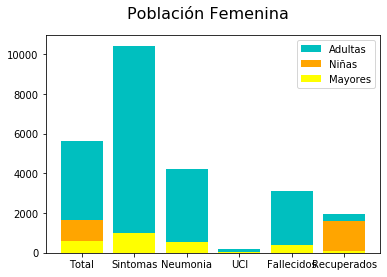

In [4]:
fig,ax=pp.subplots()

fig.suptitle('Población Femenina', fontsize=16)


ax.bar('Total',len(adultos_femenino),label='Adultas',color='c')
ax.bar('Total',len(niños_femenino),label='Niñas',color='orange')
ax.bar('Total',len(mayores_femenino),label='Mayores',color='yellow')


ax.bar('Sintomas',adultosSintomas,color='c')
ax.bar('Sintomas',len(niños_femenino_sintomas),color='orange')
ax.bar('Sintomas',mayoresSintomas,color='yellow')

ax.bar('Neumonia',len(adultos_femeninos_nuemonia),color='c')
ax.bar('Neumonia',len(niños_femenino_nuemonia),color='orange')
ax.bar('Neumonia',len(mayores_femeninos_nuemonia),color='yellow')

ax.bar('UCI',len(adultos_femeninos_cuidados),color='c')
ax.bar('UCI',len(niños_femenino_cuidados),color='orange')
ax.bar('UCI',len(mayores_femeninos_cuidados),color='yellow')

ax.bar('Fallecidos',len(adultos_femeninos_fallecidos),color='c')
ax.bar('Fallecidos',len(niños_femenino_fallecidos),color='orange')
ax.bar('Fallecidos',len(mayores_femeninos_fallecidos),color='yellow')

ax.bar('Recuperados',len(adultos_femeninos_recuperados),color='c')
ax.bar('Recuperados',len(niños_femenino_recuperados),color='orange')
ax.bar('Recuperados',len(mayores_femeninos_recuperados),color='yellow')


ax.legend()

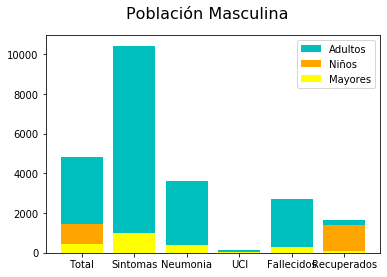

In [5]:
fig,ax=pp.subplots()

fig.suptitle('Población Masculina', fontsize=16)


ax.bar('Total',len(adultos_masculino),label='Adultos',color='c')
ax.bar('Total',len(niños_masculino),label='Niños',color='orange')
ax.bar('Total',len(mayores_masculino),label='Mayores',color='yellow')


ax.bar('Sintomas',adultosSintomas,color='c')
ax.bar('Sintomas',len(niños_masculino_sintomas),color='orange')
ax.bar('Sintomas',mayoresSintomas,color='yellow')

ax.bar('Neumonia',len(adultos_masculino_nuemonia),color='c')
ax.bar('Neumonia',len(niños_masculino_nuemonia),color='orange')
ax.bar('Neumonia',len(mayores_masculino_nuemonia),color='yellow')

ax.bar('UCI',len(adultos_masculino_cuidados),color='c')
ax.bar('UCI',len(niños_masculino_cuidados),color='orange')
ax.bar('UCI',len(mayores_masculino_cuidados),color='yellow')

ax.bar('Fallecidos',len(adultos_masculino_fallecidos),color='c')
ax.bar('Fallecidos',len(niños_masculino_fallecidos),color='orange')
ax.bar('Fallecidos',len(mayores_masculino_fallecidos),color='yellow')

ax.bar('Recuperados',len(adultos_masculino_recuperados),color='c')
ax.bar('Recuperados',len(niños_masculino_recuperados),color='orange')
ax.bar('Recuperados',len(mayores_masculino_recuperados),color='yellow')


ax.legend()

In [6]:
import pandas as pd

resultado=pd.DataFrame(columns=('Total','Sintomas','Neumonia','UCI','Fallecidos','Recuperados'))
resultado.loc[len(resultado)]=[niñosTotal,niñosSintomas,niñosNeumonia,niñosUCI,niñosFallecidos,niñosRecuperados]
resultado=resultado.rename(index={0:'Niños'})

resultado.loc[len(resultado)]=[adultosTotal,adultosSintomas,adultosNeumonia,adultosUCI,adultosFallecidos,adultosRecuperados]
resultado=resultado.rename(index={1:'Adultos'})

resultado.loc[len(resultado)]=[mayoresTotal,mayoresSintomas,mayoresNeumonia,mayoresUCI,mayoresFallecidos,mayoresRecuperados]
resultado=resultado.rename(index={2:'Mayores'})
resultado

,Total,Sintomas,Neumonia,UCI,Fallecidos,Recuperados
Niños,3102,158,130,3,95,2989
Adultos,10434,10434,7865,352,5816,3571
Mayores,1018,1018,969,46,698,179
